In [104]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install yfinance
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install scikit-learn

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, solve
import itertools
import yfinance as yf
from operator import itemgetter
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# Exam project group E

## Task a Diversification

In [106]:
#We import the data using yfinance
indexes = yf.download("^SP500-255030 ^SP500-101010 ^IXIC ^SP500-352010 ^NDX ^SP500-302030 ^SP500-352020 ^SP500-45", start="2001-02-01", end="2022-02-01")

[*********************100%***********************]  8 of 8 completed


## Task b Estimate

In [107]:
#We calculate the returns using the pandas module to choose the 'Adj close' and 'y' for year
returns = indexes['Adj Close'].resample('y').ffill().pct_change()
returns

,^IXIC,^NDX,^SP500-101010,^SP500-255030,^SP500-302030,^SP500-352010,^SP500-352020,^SP500-45
Date,,,,,,,,
2001-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-12-31,-0.315264,-0.375816,-0.125309,-0.179805,-0.116673,-0.204145,-0.215594,-0.375738
2003-12-31,0.500079,0.491228,0.182306,0.330398,0.327522,0.288472,0.064416,0.465504
2004-12-31,0.085890,0.104365,0.341610,0.211674,0.136492,0.076014,-0.094612,0.021354
2005-12-31,0.013735,0.014854,0.489910,0.079449,0.197971,0.182516,-0.059095,0.003823
2006-12-31,0.095211,0.067895,0.117969,0.201520,0.170078,-0.027463,0.125647,0.076993
2007-12-31,0.098121,0.186709,0.453603,-0.264607,0.149766,-0.034234,0.016957,0.155327
2008-12-31,-0.405406,-0.418853,-0.599075,-0.378790,-0.220494,0.103195,-0.212388,-0.436835
2009-12-31,0.438876,0.535353,0.577459,0.504076,0.184137,-0.072646,0.141856,0.599198


In [108]:
#First row was made of NaN's so we remove it
returns = returns[1:]
returns

,^IXIC,^NDX,^SP500-101010,^SP500-255030,^SP500-302030,^SP500-352010,^SP500-352020,^SP500-45
Date,,,,,,,,
2002-12-31,-0.315264,-0.375816,-0.125309,-0.179805,-0.116673,-0.204145,-0.215594,-0.375738
2003-12-31,0.500079,0.491228,0.182306,0.330398,0.327522,0.288472,0.064416,0.465504
2004-12-31,0.085890,0.104365,0.341610,0.211674,0.136492,0.076014,-0.094612,0.021354
2005-12-31,0.013735,0.014854,0.489910,0.079449,0.197971,0.182516,-0.059095,0.003823
2006-12-31,0.095211,0.067895,0.117969,0.201520,0.170078,-0.027463,0.125647,0.076993
2007-12-31,0.098121,0.186709,0.453603,-0.264607,0.149766,-0.034234,0.016957,0.155327
2008-12-31,-0.405406,-0.418853,-0.599075,-0.378790,-0.220494,0.103195,-0.212388,-0.436835
2009-12-31,0.438876,0.535353,0.577459,0.504076,0.184137,-0.072646,0.141856,0.599198
2010-12-31,0.169103,0.192199,0.339380,0.210489,0.210401,0.019413,-0.028528,0.091284


In [109]:
#Calculate the covariance matrix
returns.cov()

,^IXIC,^NDX,^SP500-101010,^SP500-255030,^SP500-302030,^SP500-352010,^SP500-352020,^SP500-45
^IXIC,0.054077,0.057409,0.026987,0.040761,0.018592,0.019392,0.021314,0.058334
^NDX,0.057409,0.062193,0.029310,0.042756,0.019850,0.018472,0.023054,0.063498
^SP500-101010,0.026987,0.029310,0.103913,0.028516,0.034541,-0.000448,0.007512,0.030243
^SP500-255030,0.040761,0.042756,0.028516,0.046547,0.014484,0.010434,0.016661,0.044929
^SP500-302030,0.018592,0.019850,0.034541,0.014484,0.026092,0.009296,0.008163,0.020075
^SP500-352010,0.019392,0.018472,-0.000448,0.010434,0.009296,0.044531,0.016793,0.014889
^SP500-352020,0.021314,0.023054,0.007512,0.016661,0.008163,0.016793,0.017575,0.024236
^SP500-45,0.058334,0.063498,0.030243,0.044929,0.020075,0.014889,0.024236,0.067659


<Figure size 432x288 with 0 Axes>

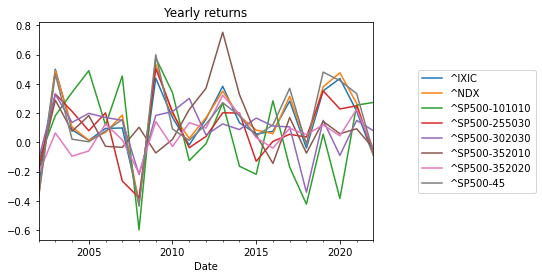

In [110]:
#A small plot to see how the returns are for each index over the period
fig = plt.figure()
returns.plot(title="Yearly returns")
plt.legend(loc='right', bbox_to_anchor=(1.5,0.5))
plt.show()

In [111]:
#Calculate the number of indices
n = returns.to_numpy().shape[1]
n

8

In [112]:
#Helper function to find the returns and covariance matrix for each rolling window
def rolling_exp_cov(window,stocks):
    expected_return = []
    covariance = []
    for i in range(0,11):
        expected_return.append(stocks[i:i+window].mean())
        covariance.append(stocks[i:i+window].cov())
    return expected_return,covariance

In [113]:
exp_rolling, cov_rolling = rolling_exp_cov(10,returns)

In [124]:
exp_rolling

[^IXIC            0.066236
 ^NDX             0.082497
 ^SP500-101010    0.165282
 ^SP500-255030    0.067755
 ^SP500-302030    0.133999
 ^SP500-352010    0.055521
 ^SP500-352020   -0.012704
 ^SP500-45        0.061421
 dtype: float64,
 ^IXIC            0.113667
 ^NDX             0.136898
 ^SP500-101010    0.176822
 ^SP500-255030    0.089737
 ^SP500-302030    0.150682
 ^SP500-352010    0.112843
 ^SP500-352020    0.018544
 ^SP500-45        0.111385
 dtype: float64,
 ^IXIC            0.101980
 ^NDX             0.122765
 ^SP500-101010    0.185575
 ^SP500-255030    0.076896
 ^SP500-302030    0.130509
 ^SP500-352010    0.159291
 ^SP500-352020    0.044263
 ^SP500-45        0.091914
 dtype: float64,
 ^IXIC            0.106786
 ^NDX             0.130265
 ^SP500-101010    0.135047
 ^SP500-255030    0.075768
 ^SP500-302030    0.125576
 ^SP500-352010    0.184328
 ^SP500-352020    0.072875
 ^SP500-45        0.107963
 dtype: float64,
 ^IXIC            0.111142
 ^NDX             0.137207
 ^SP500-101010

In [125]:
cov_rolling

[                  ^IXIC      ^NDX  ^SP500-101010  ^SP500-255030  \
 ^IXIC          0.079749  0.086691       0.074327       0.066731   
 ^NDX           0.086691  0.096087       0.084205       0.069945   
 ^SP500-101010  0.074327  0.084205       0.130589       0.064423   
 ^SP500-255030  0.066731  0.069945       0.064423       0.077841   
 ^SP500-302030  0.039724  0.043377       0.039632       0.031912   
 ^SP500-352010  0.011160  0.011410      -0.004687       0.005404   
 ^SP500-352020  0.028267  0.031905       0.022631       0.022863   
 ^SP500-45      0.087810  0.097486       0.084018       0.071691   
 
                ^SP500-302030  ^SP500-352010  ^SP500-352020  ^SP500-45  
 ^IXIC               0.039724       0.011160       0.028267   0.087810  
 ^NDX                0.043377       0.011410       0.031905   0.097486  
 ^SP500-101010       0.039632      -0.004687       0.022631   0.084018  
 ^SP500-255030       0.031912       0.005404       0.022863   0.071691  
 ^SP500-302030       

In [114]:
#Calculate the average return for each rolling window
avg_return = np.array(exp_rolling)
avg_return

avg_list = []
for i in range (0,11):
    avg = avg_return[i,:].mean()
    avg_list.append(avg.round(5)*100)

avg_list

[7.75,
 11.382,
 11.415000000000001,
 11.733,
 10.684000000000001,
 10.238999999999999,
 10.815,
 13.008000000000001,
 11.915000000000001,
 11.899999999999999,
 13.485]

## Task C Efficient frontier

In [115]:
#The expected return of the 0 rolling window, to see if it works
exp_rolling[0].to_numpy()

array([ 0.06623564,  0.08249736,  0.1652817 ,  0.06775501,  0.13399904,
        0.05552115, -0.01270432,  0.06142084])

In [116]:
#Define the return matrix and the covariance matrix as numpy
mean_returns = returns.mean().to_numpy()
cov_matrix = returns.cov()

In [117]:
#Bit of code used to show that the extreme weights "fill out" the frontier
array_of_combinations = np.loadtxt('array_of_combinations1.txt')
if 'array_of_combinations' in globals():
    print("File loaded")
else:
    print("File not loaded")
    
    #Code commented out, takes a long time to compute
    
    #sum_1 = 1
    #stocks = n
    #w = np.linspace(0,1,11)
    #combination = [i for i in itertools.combinations(w, stocks) if sum(i) == sum_1]
    #print(combination)
    #perm_of_combinations = [i for i in itertools.product(w, repeat=stocks) if sum(i) == sum_1]
    #Storing all possible combinations of portfolios in an array
    #array_of_combinations = np.array(perm_of_combinations)
    #np.savetxt('array_of_combinations1.txt',array_of_combinations)

File loaded


In [118]:
if 'array_of_combinations' in globals():
    array_of_combinations

In [119]:
#Helper function to find the expected return and volatility for a given set of weights
def other_weights(weights,mean_returns,Sigma):
    exp_return = []
    exp_vol = []
    sharpe = []
    for i in range(0,weights.shape[0]):
        exp_return.append(np.sum(mean_returns * weights[i]))
        exp_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(Sigma, weights[i]))))
        sharpe.append((np.sum(mean_returns * weights[i]) / np.sqrt(np.dot(weights[i].T, np.dot(Sigma, weights[i])))))
    return exp_return, exp_vol, sharpe

In [120]:
if 'array_of_combinations' in globals():
    exp_return, exp_vol, sharpe = other_weights(array_of_combinations,mean_returns,cov_matrix)

In [121]:
#Code from a past assigment used as inspiration for the efficient frontier.

#Lin defines the y axis, and also the targeted return
lin = np.linspace(0.14,0.05)

#A list to put in the optimal weights for the portfolio
volatility_opt = []

#Define the mean returns to numpy
meanreturns = returns.mean().to_numpy()

#Create the initial guess
w0 = n*[1./n]
    
#Create the constraints
constraintSet = (0,1)
bounds = tuple(constraintSet for asset in range(n))

#We use a minimizer so we create a helper function find the negative sharpe ratio, which will be the highest
def negativeSR(w):
    w = np.array(w)
    V = np.sqrt(w.T @ cov_matrix @ w)
    R = np.sum(meanreturns * w)
    SR = R/V
    return -1*SR

#Helper function to check if the formula sums to one. Used as a constraint on the optimizer
def checkSumToOne(w):
    return np.sum(w)-1

#Helper function to calculate the volatility of a portfolio given certain weights
def minimizeMyVolatility(w):
    w = np.array(w)
    V = np.sqrt(w.T @ cov_matrix @ w)
    return V

#Helper function to get the return of a portfolio given weights
def getReturn(w):
    w = np.array(w)
    R = np.sum(meanreturns * w)
    return R    

#An empty list
weightlist = np.zeros(n)

#Loop through each target value in linspace
for R in lin:
    #Define the constraints
    constraints = ({'type':'eq', 'fun':checkSumToOne},
                  {'type':'eq', 'fun': lambda w: getReturn(w) - R})
    #Optimize
    opt = minimize(minimizeMyVolatility, w0, method='SLSQP', bounds=bounds, constraints=constraints)
    
    #Put the results into the lists
    weightlist = np.vstack((weightlist,np.round(opt.x,3)))
    volatility_opt.append(opt['fun'])

#Another optimizer to find the optimal weights for the sharpe ratio
constraints = ({'type':'eq', 'fun':checkSumToOne})
w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bounds, constraints=constraints).x
sharpe_exp = getReturn(w_opt)
sharpe_vol = minimizeMyVolatility(w_opt)

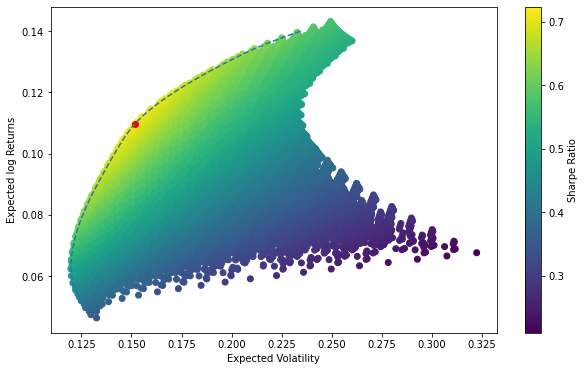

In [123]:
#Results from earlier are used to plot the efficient frontier
if 'array_of_combinations' in globals():
    plt.figure(figsize=(10,6))
    plt.scatter(exp_vol, exp_return, c = sharpe)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected log Returns')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(sharpe_vol, sharpe_exp, c='red')
    
    #Plot the line
    plt.plot(volatility_opt,lin, '--')
    plt.savefig("FilledFrontier.png")
    plt.show()

In [ ]:
#Helper function to finde various performance measures for the portfolio
def portfolio_performance(returns_mean,cov_matrix,num_portfolios,riskfree_rate=0):
    
    #Define a bunch of lists that are used later
    weight = np.zeros((num_portfolios,n))
    expectedReturn = np.zeros(num_portfolios)
    expectedVolatility = np.zeros(num_portfolios)
    SharpeRatio = np.zeros(num_portfolios)
    
    #We use a minimizer so we create a helper function find the negative sharpe ratio, which will be the highest
    def negativeSR(w):
        w = np.array(w)
        V = np.sqrt(w.T @ cov_matrix @ w)
        R = np.sum(returns_mean * w)
        SR = R/V
        return -1*SR

    #Helper function used as a constraint
    def checkSumToOne(w):
        return np.sum(w)-1

    #Helper function to minimze the volatility for a given target return
    def minimizeMyVolatility(w):
        w = np.array(w)
        V = np.sqrt(w.T @ cov_matrix @ w)
        return V

    #Helper function to find the expected return of a portfolio given certain weights
    def getReturn(w):
        w = np.array(w)
        R = np.sum(returns_mean * w)
        return R    
    
    for k in range(num_portfolios):
        # generate random weight vector
        w = np.array(np.random.random(n))
        
        #Normalize it
        w = w / np.sum(w)
        
        #Put the weight into the list
        weight[k,:] = w
        
        
        #Expected return in %
        expectedReturn[k] = np.sum(returns_mean * w)
        
        #Expected volatility
        expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
        
        # Sharpe ratio
        SharpeRatio[k] = (expectedReturn[k]-riskfree_rate) / expectedVolatility[k]    
    
    #Define the linspace for the target values
    lin = np.linspace(0.20,0.08)
    
    #Create a list for optimal volatility weights
    volatility_opt = []
    
    #Create the initial guess
    w0 = n*[1./n]
    
    #Create the constraints
    constraintSet = (0,1)
    bounds = tuple(constraintSet for asset in range(n))
    
    #Loop through each target value and find the optimal volatility
    for R in lin:

        constraints = ({'type':'eq', 'fun':checkSumToOne},
                      {'type':'eq', 'fun': lambda w: getReturn(w) - R})
        opt = minimize(minimizeMyVolatility, w0, method='SLSQP', bounds=bounds, constraints=constraints)
        volatility_opt.append(opt['fun'])
        
    #Find the optimal point with the highest sharpe ratio
    constraints = ({'type':'eq', 'fun':checkSumToOne})
    w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bounds, constraints=constraints).x
    sharpe_exp = getReturn(w_opt)
    sharpe_vol = minimizeMyVolatility(w_opt)
    
    return expectedReturn, expectedVolatility, SharpeRatio, volatility_opt, (sharpe_exp,sharpe_vol,(sharpe_exp-riskfree_rate) / sharpe_vol), lin, w_opt

In [ ]:
num_portfolios = 10000
expectedReturn, expectedVolatility, SharpeRatio, volatility_opt, sharpepoint, lin, weightlist = portfolio_performance(mean_returns,cov_matrix,num_portfolios,riskfree_rate=0)

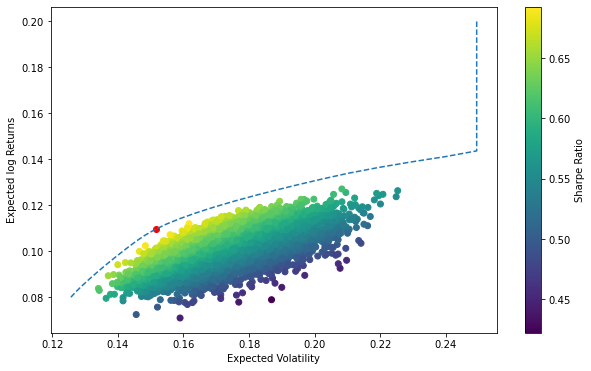

In [ ]:
#Test plot to see if it works
plt.figure(figsize=(10,6))
plt.scatter(expectedVolatility, expectedReturn, c = SharpeRatio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected log Returns')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(sharpepoint[1], sharpepoint[0], c='red')
plt.plot(volatility_opt,lin, '--')
plt.show()

For rolling window=  0
The maximum Sharpe ratio portfolio is:
Returns: 13.40%
Volatility: 17.25%
Max sharpe ratio: 0.78


For rolling window=  1
The maximum Sharpe ratio portfolio is:
Returns: 13.41%
Volatility: 10.85%
Max sharpe ratio: 1.24


For rolling window=  2
The maximum Sharpe ratio portfolio is:
Returns: 13.88%
Volatility: 11.80%
Max sharpe ratio: 1.18


For rolling window=  3
The maximum Sharpe ratio portfolio is:
Returns: 14.43%
Volatility: 11.91%
Max sharpe ratio: 1.21


For rolling window=  4
The maximum Sharpe ratio portfolio is:
Returns: 13.71%
Volatility: 11.71%
Max sharpe ratio: 1.17


For rolling window=  5
The maximum Sharpe ratio portfolio is:
Returns: 12.82%
Volatility: 11.99%
Max sharpe ratio: 1.07


For rolling window=  6
The maximum Sharpe ratio portfolio is:
Returns: 13.32%
Volatility: 12.14%
Max sharpe ratio: 1.10


For rolling window=  7
The maximum Sharpe ratio portfolio is:
Returns: 13.69%
Volatility: 11.02%
Max sharpe ratio: 1.24


For rolling window=  8
T

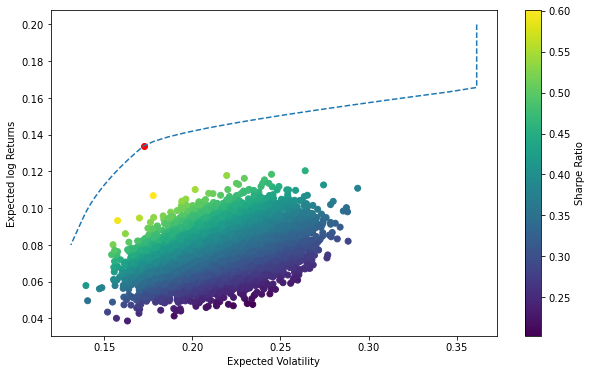

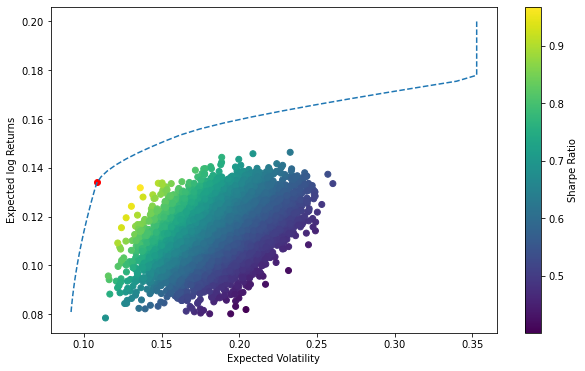

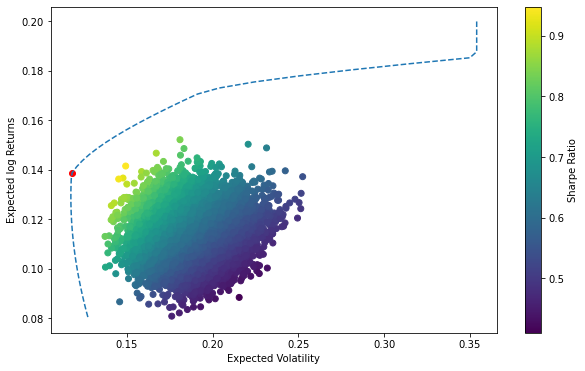

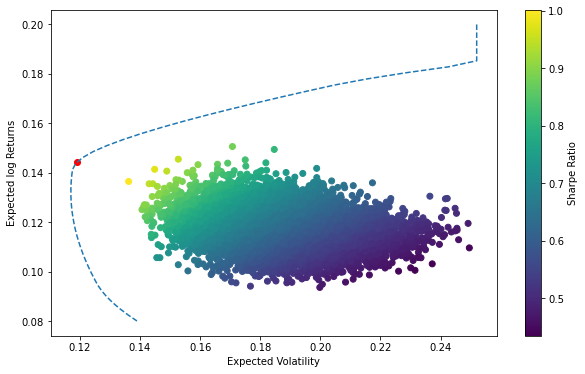

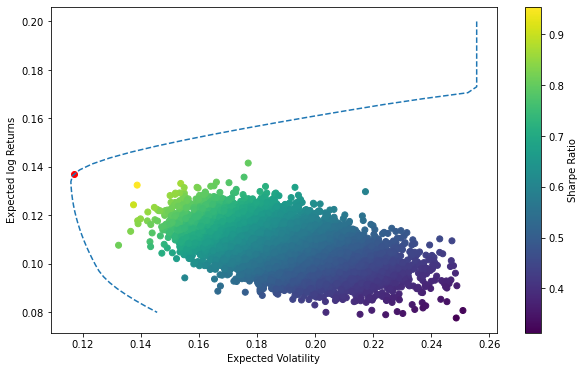

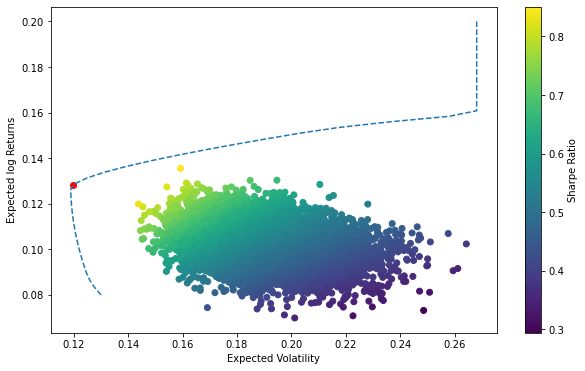

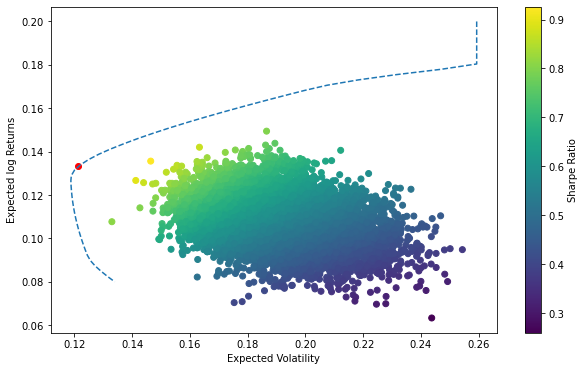

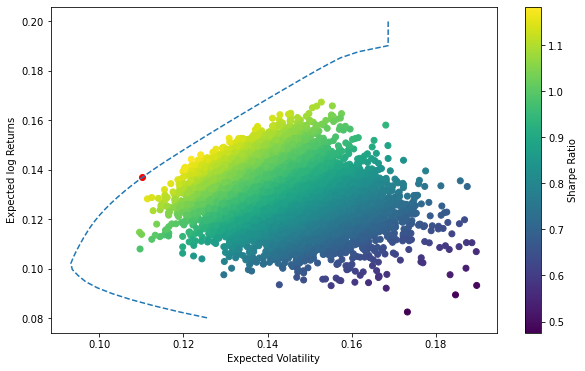

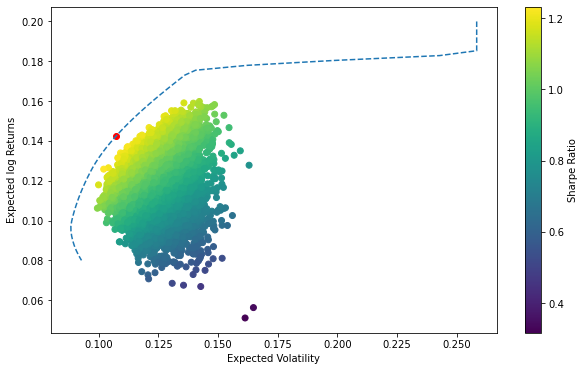

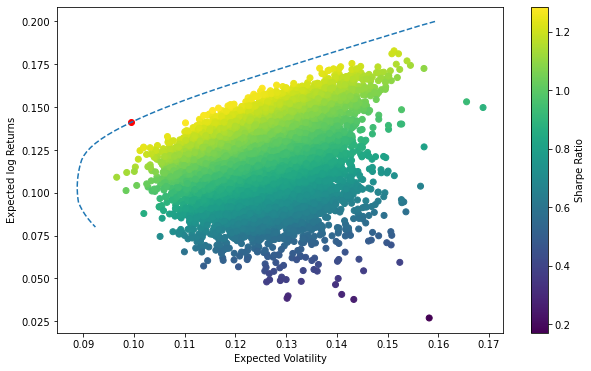

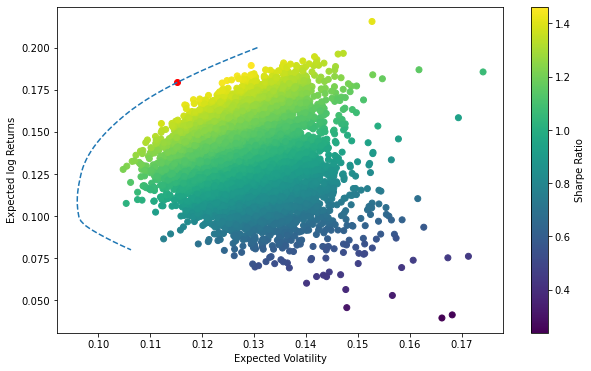

In [ ]:
counter = 0
num_portfolios = 10000
#Loop through each rolling window and do the calculations and plot the efficient frontier
for i in range(0,11):
    expectedReturn, expectedVolatility, SharpeRatio, volatility_opt, sharpepoint, lin, weightlist = portfolio_performance(exp_rolling[i].to_numpy(),cov_rolling[i].to_numpy(),num_portfolios,riskfree_rate=0)
    print("For rolling window= ",i)
    print("The maximum Sharpe ratio portfolio is:")
    print(f"Returns: {sharpepoint[0] * 100:.2f}%")
    print(f"Volatility: {sharpepoint[1]* 100:.2f}%")
    print(f"Max sharpe ratio: {sharpepoint[2]:.2f}")
    print("\n")
    plt.figure(figsize=(10,6))
    plt.scatter(expectedVolatility, expectedReturn, c = SharpeRatio)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected log Returns')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(sharpepoint[1], sharpepoint[0], c='red')
    plt.plot(volatility_opt,lin, '--')
    name = "rollingwindow" + str(counter) +".png"
    plt.savefig(name)
    counter += 1

# Task D Tobin separation

For rolling window=  0
The maximum Sharpe ratio portfolio is:
Returns: 13.40%
Volatility: 17.25%
Max sharpe ratio: 0.72


For rolling window=  1
The maximum Sharpe ratio portfolio is:
Returns: 13.41%
Volatility: 10.85%
Max sharpe ratio: 1.14


For rolling window=  2
The maximum Sharpe ratio portfolio is:
Returns: 13.88%
Volatility: 11.80%
Max sharpe ratio: 1.09


For rolling window=  3
The maximum Sharpe ratio portfolio is:
Returns: 14.43%
Volatility: 11.91%
Max sharpe ratio: 1.13


For rolling window=  4
The maximum Sharpe ratio portfolio is:
Returns: 13.71%
Volatility: 11.71%
Max sharpe ratio: 1.09


For rolling window=  5
The maximum Sharpe ratio portfolio is:
Returns: 12.82%
Volatility: 11.99%
Max sharpe ratio: 0.99


For rolling window=  6
The maximum Sharpe ratio portfolio is:
Returns: 13.32%
Volatility: 12.14%
Max sharpe ratio: 1.01


For rolling window=  7
The maximum Sharpe ratio portfolio is:
Returns: 13.69%
Volatility: 11.02%
Max sharpe ratio: 1.15


For rolling window=  8
T

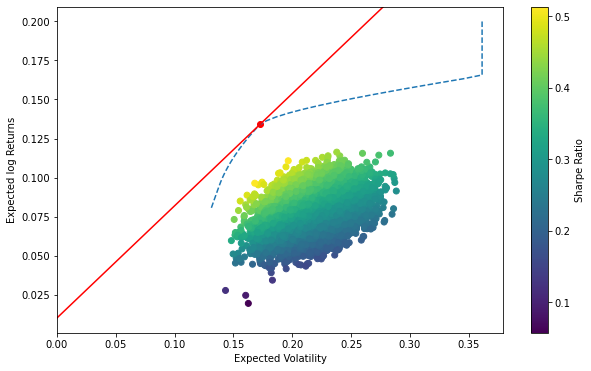

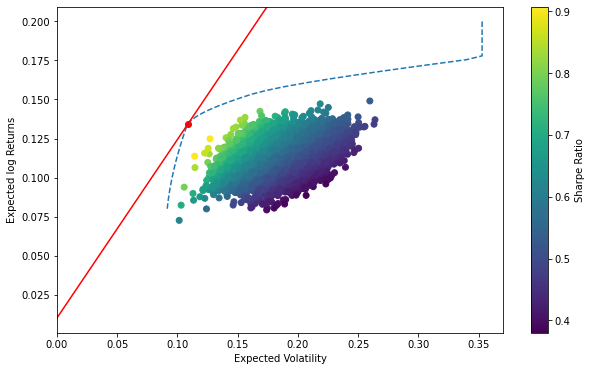

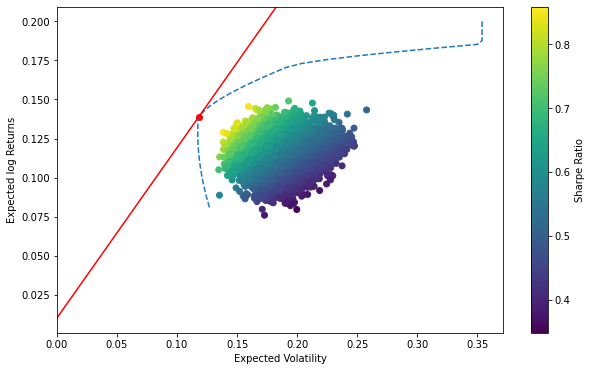

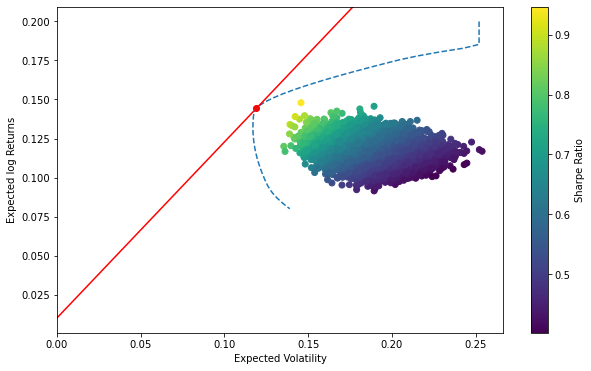

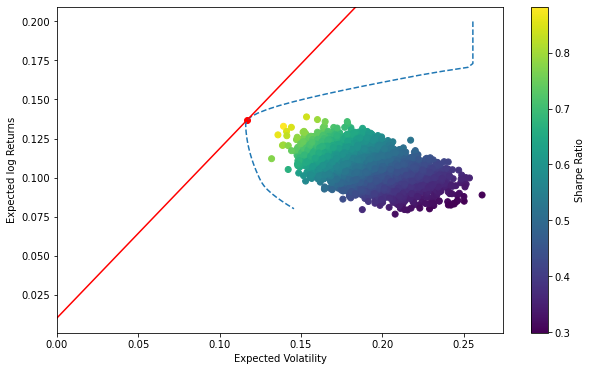

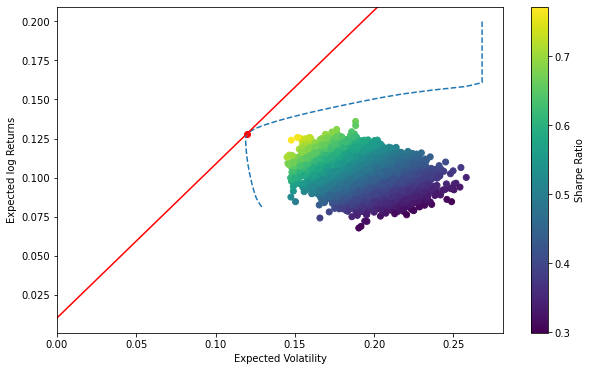

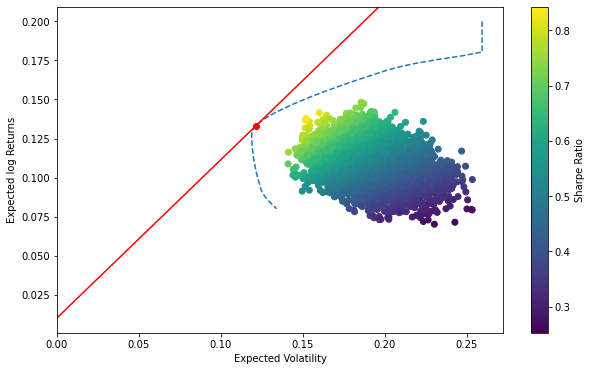

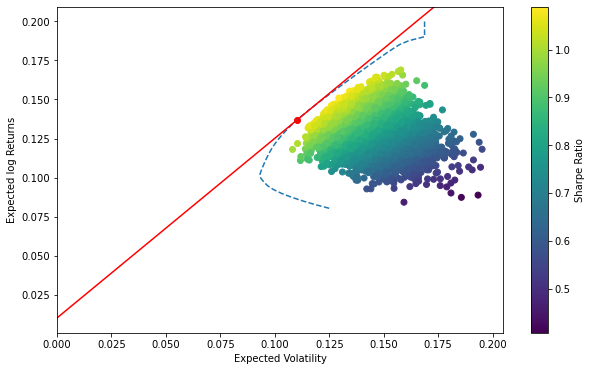

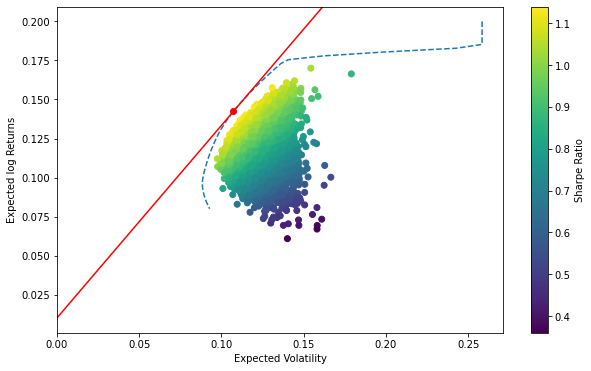

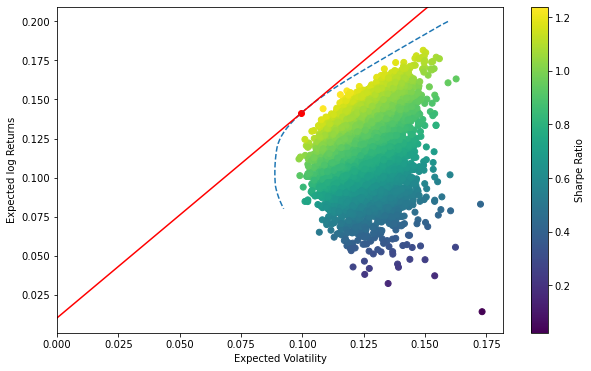

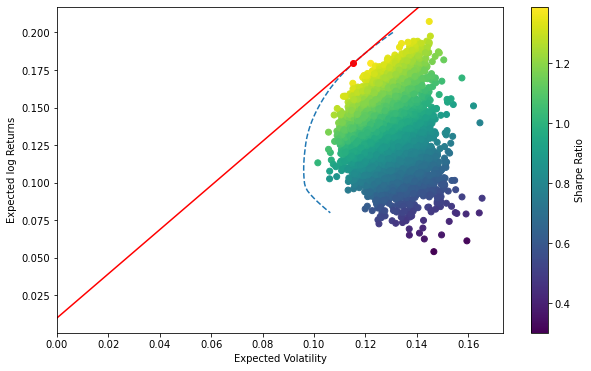

In [ ]:
#Same as before but a line is added that goes between the point on the y-axis and through the optimal portfolio point
num_portfolios = 10000
opt_sharpe = []
opt_weightlist = []
counter = 0
for i in range(0,11):
    R_f_point = [0,0.01]
    expectedReturn, expectedVolatility, SharpeRatio, volatility_opt, sharpepoint, lin, weightlist = portfolio_performance(exp_rolling[i].to_numpy(),cov_rolling[i].to_numpy(),num_portfolios,riskfree_rate=0.01)
    opt_sharpe.append(sharpepoint)
    opt_weightlist.append(weightlist)
    print("For rolling window= ",i)
    print("The maximum Sharpe ratio portfolio is:")
    print(f"Returns: {sharpepoint[0] * 100:.2f}%")
    print(f"Volatility: {sharpepoint[1]* 100:.2f}%")
    print(f"Max sharpe ratio: {sharpepoint[2]:.2f}")
    print("\n")
    plt.figure(figsize=(10,6))
    plt.scatter(expectedVolatility, expectedReturn, c = SharpeRatio)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected log Returns')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(sharpepoint[1], sharpepoint[0], c='red')
    plt.plot(volatility_opt,lin, '--')
    plt.axline(R_f_point,(sharpepoint[1],sharpepoint[0]),color='red')
    plt.xlim(xmin=0)
    name = "tobinwindow" + str(counter) +".png"
    plt.savefig(name)
    counter += 1


# Task E Asset allocation

In [ ]:
#Print the optimal weights for each rolling window
opt_weightlist

[array([2.51499260e-15, 3.36011426e-15, 0.00000000e+00, 2.74355905e-15,
        1.00000000e+00, 0.00000000e+00, 1.21023219e-15, 1.29127987e-15]),
 array([5.28711442e-16, 9.48879639e-17, 1.05129702e-01, 0.00000000e+00,
        3.82947468e-01, 5.11922830e-01, 3.04085675e-16, 2.84396909e-16]),
 array([0.00000000e+00, 3.93310464e-16, 6.58191844e-17, 0.00000000e+00,
        7.12690817e-01, 2.87309183e-01, 0.00000000e+00, 0.00000000e+00]),
 array([4.54390943e-16, 0.00000000e+00, 0.00000000e+00, 1.00424017e-16,
        6.81352641e-01, 3.18647359e-01, 5.23422647e-16, 1.65771931e-16]),
 array([0.00000000e+00, 1.56699157e-16, 0.00000000e+00, 7.53511823e-18,
        6.98062603e-01, 3.01937397e-01, 0.00000000e+00, 8.65958006e-18]),
 array([2.24882504e-16, 3.15125585e-16, 0.00000000e+00, 0.00000000e+00,
        7.26967577e-01, 2.73032423e-01, 0.00000000e+00, 5.28336084e-17]),
 array([0.00000000e+00, 1.88195408e-16, 0.00000000e+00, 2.55777281e-17,
        6.87742283e-01, 3.12257717e-01, 0.00000000e+

In [ ]:
#Remake the optimal sharpe ratio to a numpy array
opt_sharpe = np.array(opt_sharpe)
opt_sharpe

array([[0.13399904, 0.17248897, 0.71888098],
       [0.13405959, 0.10845422, 1.14388898],
       [0.13877804, 0.11800801, 1.09126519],
       [0.1442972 , 0.11905844, 1.127994  ],
       [0.13706631, 0.11706007, 1.08547949],
       [0.1282006 , 0.11990777, 0.98576259],
       [0.13320285, 0.12138938, 1.01493923],
       [0.13693591, 0.11024147, 1.1514352 ],
       [0.14242099, 0.10727184, 1.23444322],
       [0.1410747 , 0.09941546, 1.31845387],
       [0.1793676 , 0.11521274, 1.47004232]])

In [ ]:
#Helper function to find the amount that should be invested in the risk free asset and the risky asset
def tobin_solve(rf,opt_sharpe,target):
    tobin_weights = []
    tobin_vol = []
    for i in range(0,11):
        vol = opt_sharpe[i,1]
        exp = opt_sharpe[i,0]
        print("For i=",i)
        #print("Exp=",exp)
        #print("Vol=",vol)
        
        y = symbols('y')
        expr = rf+((exp-rf)/vol)*y-target

        vol_c = solve(expr)
        
        x = vol_c/vol
        
        tobin_exp = (1-x)*rf + x *exp
        
        print("Amount invested in risky asset=",x[0])
        print("Expected return =",tobin_exp[0])
        print("Expected vol=",vol_c[0])
        print("\n")
        
        tobin_vol.append(vol_c)
        tobin_weights.append(x[0])
    return tobin_weights, tobin_vol

In [ ]:
rf = 0.01
target = 0.10
tobin_weights, tobin_vol = tobin_solve(rf,opt_sharpe,target)
print(tobin_weights)

For i= 0
Amount invested in risky asset= 0.725812084193279
Expected return = 0.100000000000000
Expected vol= 0.125194576435035


For i= 1
Amount invested in risky asset= 0.725457803984246
Expected return = 0.0999999999999998
Expected vol= 0.0786789638813489


For i= 2
Amount invested in risky asset= 0.698876932104347
Expected return = 0.100000000000000
Expected vol= 0.0824730789908976


For i= 3
Amount invested in risky asset= 0.670155432803584
Expected return = 0.100000000000000
Expected vol= 0.0797876586476138


For i= 4
Amount invested in risky asset= 0.708291600232176
Expected return = 0.100000000000000
Expected vol= 0.0829126674027089


For i= 5
Amount invested in risky asset= 0.761417464706694
Expected return = 0.100000000000000
Expected vol= 0.0912998737847925


For i= 6
Amount invested in risky asset= 0.730502585957917
Expected return = 0.100000000000000
Expected vol= 0.0886752595887737


For i= 7
Amount invested in risky asset= 0.709019207404667
Expected return = 0.09999999999

In [ ]:
tobin_weights = np.array(tobin_weights)
tobin_weights

array([0.725812084193279, 0.725457803984246, 0.698876932104347,
       0.670155432803584, 0.708291600232176, 0.761417464706694,
       0.730502585957917, 0.709019207404667, 0.679650553194684,
       0.686631369993459, 0.531388529804571], dtype=object)

In [ ]:
#Helper function to find the turnover change
def turnover(tobin_weights,opt_weightlist):
    
    x_turnover = []
    weights_turnover = []
    #opt_scaled = []
    
    for i in range(0,10):
        #opt_scaled.append(tobin_weights[i]*opt_weightlist[i])
        #opt_scaled.append(tobin_weights[i+1]*opt_weightlist[i+1])
        
        x_turnover.append(abs(tobin_weights[i]-tobin_weights[i+1]))
        
        weights_turnover.append(np.sum(np.abs((tobin_weights[i]*opt_weightlist[i])-(tobin_weights[i+1]*opt_weightlist[i+1]))))
    
    return x_turnover, weights_turnover

In [ ]:
x_turnover, weights_turnover = turnover(tobin_weights,opt_weightlist)

In [ ]:
#The turnover in the amount invested in the risky asset vs risk free
x_turnover

[0.000354280209032720,
 0.0265808718798988,
 0.0287214993007631,
 0.0381361674285914,
 0.0531258644745184,
 0.0309148787487773,
 0.0214833785532502,
 0.0293686542099827,
 0.00698081679877538,
 0.155242840188889]

In [ ]:
#The amount of turnover within the risky asset
weights_turnover

[0.895645429590830,
 0.467122756583826,
 0.0542204963749634,
 0.0381361674285932,
 0.0650619982444282,
 0.0713417078309873,
 1.22844296678257,
 0.241211726195209,
 0.789275884286001,
 0.358242318107888]

In [ ]:
x = np.linspace(0,9,10)
x

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

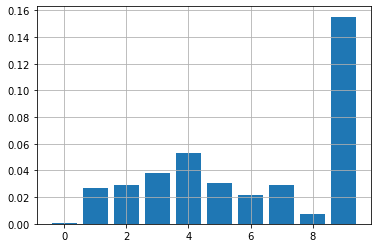

In [ ]:
#Plot for turnover in amount invsted in risky/riskless asset
fig = plt.figure()
x = np.linspace(0,9,10)
plt.bar(x,x_turnover)
plt.grid()
plt.savefig("tobinturnover.png")
plt.show()

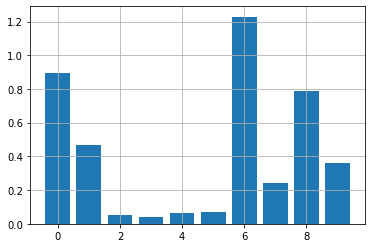

In [ ]:
#Plot for turnover within weights in the portfolio
fig = plt.figure()
x = np.linspace(0,9,10)
plt.bar(x,weights_turnover)
plt.grid()
plt.savefig("weightsturnover.png")
plt.show()

# Task F Backtest

In [ ]:
opt_weightlist

[array([2.51499260e-15, 3.36011426e-15, 0.00000000e+00, 2.74355905e-15,
        1.00000000e+00, 0.00000000e+00, 1.21023219e-15, 1.29127987e-15]),
 array([5.28711442e-16, 9.48879639e-17, 1.05129702e-01, 0.00000000e+00,
        3.82947468e-01, 5.11922830e-01, 3.04085675e-16, 2.84396909e-16]),
 array([0.00000000e+00, 3.93310464e-16, 6.58191844e-17, 0.00000000e+00,
        7.12690817e-01, 2.87309183e-01, 0.00000000e+00, 0.00000000e+00]),
 array([4.54390943e-16, 0.00000000e+00, 0.00000000e+00, 1.00424017e-16,
        6.81352641e-01, 3.18647359e-01, 5.23422647e-16, 1.65771931e-16]),
 array([0.00000000e+00, 1.56699157e-16, 0.00000000e+00, 7.53511823e-18,
        6.98062603e-01, 3.01937397e-01, 0.00000000e+00, 8.65958006e-18]),
 array([2.24882504e-16, 3.15125585e-16, 0.00000000e+00, 0.00000000e+00,
        7.26967577e-01, 2.73032423e-01, 0.00000000e+00, 5.28336084e-17]),
 array([0.00000000e+00, 1.88195408e-16, 0.00000000e+00, 2.55777281e-17,
        6.87742283e-01, 3.12257717e-01, 0.00000000e+

In [ ]:
#Helper function to conduct the backtest
def ex_post(opt_weightlist,returns):
    realized_std = []
    realized_return = []
    stock_numpy = returns.to_numpy()
    for i in range(0,11):
        weight = opt_weightlist[i]
        
        #Calc realized return
        realized_return.append(weight @ stock_numpy[i+10])
        
        #Calc std
        variance = weight.T @ returns[i:i+10].cov().to_numpy() @ weight
        std = np.sqrt(variance)
        realized_std.append(std)
        
    return realized_return, realized_std

In [ ]:
ex_post_return,ex_post_std = ex_post(opt_weightlist,returns)

In [ ]:
#Actual return
ex_post_return

[0.05015701094511422,
 0.4619887234314428,
 0.15589608218537357,
 0.128878246624546,
 0.03417767295527694,
 0.12301395422780685,
 -0.2575499377820356,
 0.2311433970764071,
 0.281180663073745,
 0.2595048501427419,
 -0.061971693325175645]

In [ ]:
#Actual std
ex_post_std

[0.17248896671951375,
 0.10845422497248021,
 0.11800801429025244,
 0.11905843740432495,
 0.11706007437548371,
 0.11990777466598052,
 0.12138938491571903,
 0.1102414732872406,
 0.10727183638349891,
 0.09941546083470537,
 0.11521273748963873]

In [ ]:
#Mean return
np.mean(ex_post_return)

0.12785626995956756

In [ ]:
#Mean std
np.mean(ex_post_std)

0.1189553077580762

# Task G Beta

In [ ]:
reg = LinearRegression()

In [ ]:
market = yf.download("^GSPC", start="2001-02-01", end="2022-02-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
market_returns = market['Adj Close'].resample('y').ffill().pct_change()
print(market_returns)
market_returns = market_returns[1:]
print(market_returns)

Date
2001-12-31         NaN
2002-12-31   -0.233660
2003-12-31    0.263804
2004-12-31    0.089935
2005-12-31    0.030010
2006-12-31    0.136194
2007-12-31    0.035296
2008-12-31   -0.384858
2009-12-31    0.234542
2010-12-31    0.127827
2011-12-31   -0.000032
2012-12-31    0.134057
2013-12-31    0.296012
2014-12-31    0.113906
2015-12-31   -0.007266
2016-12-31    0.095350
2017-12-31    0.194200
2018-12-31   -0.062373
2019-12-31    0.288781
2020-12-31    0.162589
2021-12-31    0.268927
2022-12-31   -0.052585
Freq: A-DEC, Name: Adj Close, dtype: float64
Date
2002-12-31   -0.233660
2003-12-31    0.263804
2004-12-31    0.089935
2005-12-31    0.030010
2006-12-31    0.136194
2007-12-31    0.035296
2008-12-31   -0.384858
2009-12-31    0.234542
2010-12-31    0.127827
2011-12-31   -0.000032
2012-12-31    0.134057
2013-12-31    0.296012
2014-12-31    0.113906
2015-12-31   -0.007266
2016-12-31    0.095350
2017-12-31    0.194200
2018-12-31   -0.062373
2019-12-31    0.288781
2020-12-31    0.162589
20

In [ ]:
#We take the last 10 windows because of the rolling windows
rf = 0.01
X = market_returns.to_numpy()
X = X[10:].reshape(-1,1)-rf
X

array([[ 0.12405691],
       [ 0.2860125 ],
       [ 0.10390634],
       [-0.017266  ],
       [ 0.08535023],
       [ 0.18419966],
       [-0.0723726 ],
       [ 0.2787807 ],
       [ 0.15258923],
       [ 0.25892739],
       [-0.06258517]])

In [ ]:
#Define Y, the realized return of the portfolio minus the rf
Y = np.array(ex_post_return)-rf
Y

array([ 0.04015701,  0.45198872,  0.14589608,  0.11887825,  0.02417767,
        0.11301395, -0.26754994,  0.2211434 ,  0.27118066,  0.24950485,
       -0.07197169])

In [ ]:
#Fit x on y, does the linear regression
reg.fit(X,Y)
print("Portfolio beta=",reg.coef_[0])
print("Portfolio alpha=",reg.intercept_)

Portfolio beta= 1.2267046972930118
Portfolio alpha= -0.029526632430963595


# Task H Timing

In [ ]:
#Test for the entire portfolio
#T = (np.mean(ex_post_return)-rf)/reg.coef_[0]
#print("The normal Treynor measure is: ",T)

In [ ]:
#Define y
Y = np.array(ex_post_return).reshape(-1,1) - rf
Y

array([[ 0.04015701],
       [ 0.45198872],
       [ 0.14589608],
       [ 0.11887825],
       [ 0.02417767],
       [ 0.11301395],
       [-0.26754994],
       [ 0.2211434 ],
       [ 0.27118066],
       [ 0.24950485],
       [-0.07197169]])

In [ ]:
#Define, x the market
X = market_returns.to_numpy()
X = X[10:].reshape(-1,1)-rf
X

array([[ 0.12405691],
       [ 0.2860125 ],
       [ 0.10390634],
       [-0.017266  ],
       [ 0.08535023],
       [ 0.18419966],
       [-0.0723726 ],
       [ 0.2787807 ],
       [ 0.15258923],
       [ 0.25892739],
       [-0.06258517]])

In [ ]:
#Define x^2
X2 = X**2
X2

array([[0.01539012],
       [0.08180315],
       [0.01079653],
       [0.00029811],
       [0.00728466],
       [0.03392951],
       [0.00523779],
       [0.07771868],
       [0.02328347],
       [0.06704339],
       [0.0039169 ]])

In [ ]:
#Create the X matrix
Xstack = np.hstack((X,X2))
Xstack

array([[ 0.12405691,  0.01539012],
       [ 0.2860125 ,  0.08180315],
       [ 0.10390634,  0.01079653],
       [-0.017266  ,  0.00029811],
       [ 0.08535023,  0.00728466],
       [ 0.18419966,  0.03392951],
       [-0.0723726 ,  0.00523779],
       [ 0.2787807 ,  0.07771868],
       [ 0.15258923,  0.02328347],
       [ 0.25892739,  0.06704339],
       [-0.06258517,  0.0039169 ]])

In [ ]:
poly_reg_model = LinearRegression()

In [ ]:
#Fit x on y
poly_reg_model.fit(Xstack, Y)
print("Alpha is: ",poly_reg_model.intercept_[0])
print("Beta is: ",poly_reg_model.coef_[0,0])
print("C is: ",poly_reg_model.coef_[0,1])

Alpha is:  -0.027700292967978046
Beta is:  1.325960877051955
C is:  -0.4630105465761575


In [ ]:
#Another way to do it

In [ ]:
#Define X
#X = market_returns.to_numpy()
#X = X[10:].reshape(-1,1)-rf

In [ ]:
#Define Y
#Y = np.array(ex_post_return).reshape(-1,1) - rf
#Y

In [ ]:
#For each rolling window calculate beta and put it into a list
betas = []
for i in range(0,11):
    print("For index =",i)
    y = symbols('y')
    expr = rf+(X[i]-rf)*y-Y[i]
    beta = solve(expr)
    print("Portfolio beta=",beta[y])
    print("\n")
    betas.append(beta[y])

For index = 0
Portfolio beta= 0.264403192574044


For index = 1
Portfolio beta= 1.60133591871366


For index = 2
Portfolio beta= 1.44714494539387


For index = 3
Portfolio beta= -3.99318777166497


For index = 4
Portfolio beta= 0.188157004713934


For index = 5
Portfolio beta= 0.591355672260618


For index = 6
Portfolio beta= 3.36944497137379


For index = 7
Portfolio beta= 0.785560106464685


For index = 8
Portfolio beta= 1.83169978583498


For index = 9
Portfolio beta= 0.962147449506663


For index = 10
Portfolio beta= 1.12931744791431




In [ ]:
print(betas)

[0.264403192574044, 1.60133591871366, 1.44714494539387, -3.99318777166497, 0.188157004713934, 0.591355672260618, 3.36944497137379, 0.785560106464685, 1.83169978583498, 0.962147449506663, 1.12931744791431]


In [ ]:
#For each rolling window calculate the treynor measure
for i in range(0,11):
    T = (Y[i]-rf)/betas[i]
    print(T)

[0.114056909266211]
[0.276012495733243]
[0.0939063378674809]
[-0.0272659972058236]
[0.0753502266728368]
[0.174199655232879]
[-0.0823725984962067]
[0.268780702251584]
[0.142589230557062]
[0.248927386613712]
[-0.0725851650273938]


# Task 2

In [ ]:
%reset -f

In [ ]:
import numpy as np
import pandas as pd
import math as mt

In [ ]:
bonds = pd.read_csv('bonds.csv')
bonds

,Names,Germany,Austria,Italy,Spain,Finland,Austria 100 years
0,Price of present date,99.1630,116.1900,95.155,92.840,97.33000,79.000
1,Face Value,100.0000,100.0000,100.000,100.000,100.00000,100.000
2,Maturity,10.0000,30.0000,3.000,10.000,30.00000,100.000
3,Coupon rate,0.0175,0.0625,0.012,0.014,0.02625,0.021
4,Coupon frequency,1.0000,1.0000,2.000,1.000,1.00000,1.000
5,Coupon payments,1.7500,6.2500,1.200,1.400,2.62500,2.100
6,Start year,2014.0000,1997.0000,2022.000,2018.000,2012.00000,2017.000
7,End year,2024.0000,2027.0000,2025.000,2028.000,2042.00000,2117.000
8,Initial price,100.7800,125.9800,98.745,98.990,102.91000,101.850


# All prices are listed in the same currency - Euros

In [ ]:
bonds_ = bonds.drop(['Names'], axis = 1)
bonds_

,Germany,Austria,Italy,Spain,Finland,Austria 100 years
0,99.1630,116.1900,95.155,92.840,97.33000,79.000
1,100.0000,100.0000,100.000,100.000,100.00000,100.000
2,10.0000,30.0000,3.000,10.000,30.00000,100.000
3,0.0175,0.0625,0.012,0.014,0.02625,0.021
4,1.0000,1.0000,2.000,1.000,1.00000,1.000
5,1.7500,6.2500,1.200,1.400,2.62500,2.100
6,2014.0000,1997.0000,2022.000,2018.000,2012.00000,2017.000
7,2024.0000,2027.0000,2025.000,2028.000,2042.00000,2117.000
8,100.7800,125.9800,98.745,98.990,102.91000,101.850


## Converting the data to numpy instead of dataframe

In [ ]:
bonds_num = bonds_.to_numpy()

# A) ytm, duration \& convexity

## Years to maturity

In [ ]:
# Func to optimize ytm through anonymous function
def bond_ytm(price, face_value, maturity, coupon, freq=2, guess=0.05):
 

    #freq is converted to a float in order to ensure that it can be used in calculations with decimal numbers.
    freq = float(freq)

    #We calculate the total number of coupon payments over the life of the bond, by multiplying freq by T. This is stored in "periods"
    periods = maturity * freq

    #coup_rate is calculated by dividing coup by face value, which gives the coupon rate as a decimal.
    coup_rate = coupon / face_value

    #dt is a list comprehension that creates a list of the times of each coupon payment, calculated as a fraction of the total number of periods.
    dt = [(i + 1) / freq for i in range(int(periods))]
    
    ytm_func = lambda y: sum([coup_rate / (1 + y / freq) ** (freq * t) for t in dt]) - price / face_value + 1 / (1 + y / freq) ** (freq * maturity)
    ytm = guess
    for i in range(100):
        #Newton-Raphson method to update the estimate of the YTM. Keeps updating YTM for 100 iterations and then returns YTM
        ytm = ytm - ytm_func(ytm) / derivative(ytm_func, ytm)
    return ytm

#Helper function to derive the derivative of the function, in our Newton-Raphson method
def derivative(func, x, dx=1e-6):
    return (func(x + dx) - func(x)) / dx

## YTM with present date price

### Computing remaining years from 2023 and until the bonds expire

In [ ]:
remaining_year_list = []
for i in range(0, 6):
    #Calculating the remaining years to maturity for each bond
    remaining_years = bonds_num[7, i] - 2023

    #Appending to the empty list
    remaining_year_list.append(remaining_years)

In [ ]:
remaining_year_list

[1.0, 4.0, 2.0, 5.0, 19.0, 94.0]

In [ ]:
ytm_list = []
for i in range (0,6):
    res = bond_ytm(price = bonds_num[0, i], face_value = bonds_num[1, i], maturity = remaining_year_list[i], coupon = bonds_num[5, i], freq = bonds_num[4, i])
    ytm_list.append(res)
    print('The YTM for bond: ', bonds.keys()[i+1], 'is', (100*res).round(4), '%')

The YTM for bond:  Germany is 2.6088 %
The YTM for bond:  Austria is 1.9983 %
The YTM for bond:  Italy is 4.975 %
The YTM for bond:  Spain is 2.9617 %
The YTM for bond:  Finland is 2.8083 %
The YTM for bond:  Austria 100 years is 2.7213 %


## YTM with initial prices (Initial prices are those prices offered at the start of the bond "Life time")

In [ ]:
ytm_list = []
for i in range (0,6):
    res = bond_ytm(price = bonds_num[8, i], face_value = bonds_num[1, i], maturity = bonds_num[2, i], coupon = bonds_num[5, i], freq = bonds_num[4, i])
    ytm_list.append(res)
    print('This is ytm for bond: ', bonds.keys()[i+1],'is ', (100*res).round(4), '%')

This is ytm for bond:  Germany is  1.6647 %
This is ytm for bond:  Austria is  4.6305 %
This is ytm for bond:  Italy is  2.8394 %
This is ytm for bond:  Spain is  1.5096 %
This is ytm for bond:  Finland is  2.4862 %
This is ytm for bond:  Austria 100 years is  2.0562 %


# Dirty Price

In [ ]:
#The dirty price is computed using the formula from slide 4 from the lecture december the 12th (Chapter 21)
def dirty_price(ytm, face_value, maturity, coupon):
    dirty_p = 0

    #Looping through all the periods of each bond
    for t in range(1, int(maturity)):

        #Computing the dirty price from all periods except the last
        dirty_p += coupon / (1+ytm)**t

    #Computing the dirty price of the last period, by adding with face_value - as shown in the book on page 520
    last_dirty_p = (coupon + face_value) / (1 + ytm)**maturity

    #Returning dirty price
    return dirty_p + last_dirty_p 
        

### Orginal price for each bond (Computed in euros)


In [ ]:
for i in range(0,6):
    print('The original price of the goverment bond from', bonds.keys()[i+1], 'Is', bonds_num[0, i])

The original price of the goverment bond from Germany Is 99.163
The original price of the goverment bond from Austria Is 116.19
The original price of the goverment bond from Italy Is 95.155
The original price of the goverment bond from Spain Is 92.84
The original price of the goverment bond from Finland Is 97.33
The original price of the goverment bond from Austria 100 years Is 79.0


## Dirty price for each bond - thus, the price/cost of the bond with accrued interest included

In [ ]:
dirt_price_list = []
for i in range(0,6):
    result = dirty_price(ytm = ytm_list[i], face_value = bonds_num[0, i], maturity = bonds_num[2, i], coupon = bonds_num[5, i])
    dirt_price_list.append(result)
    print('The dirty price of the goverment bond from', bonds.keys()[i+1], 'Is', result.round(4))

The dirty price of the goverment bond from Germany Is 100.0704
The dirty price of the goverment bond from Austria Is 130.1439
The dirty price of the goverment bond from Italy Is 90.8938
The dirty price of the goverment bond from Spain Is 92.8263
The dirty price of the goverment bond from Finland Is 101.632
The dirty price of the goverment bond from Austria 100 years Is 99.1068


## Difference between original price and dirty price

In [ ]:
for i in range(0, 6):
    dif = ((dirt_price_list[i] - bonds_num[0,i]) / bonds_num[0, i]) * 100
    print('This is the difference between the dirty price and original price of the goverment bond from ', bonds.keys()[i+1], 'Is', dif.round(4), '%')

This is the difference between the dirty price and original price of the goverment bond from  Germany Is 0.915 %
This is the difference between the dirty price and original price of the goverment bond from  Austria Is 12.0096 %
This is the difference between the dirty price and original price of the goverment bond from  Italy Is -4.4781 %
This is the difference between the dirty price and original price of the goverment bond from  Spain Is -0.0148 %
This is the difference between the dirty price and original price of the goverment bond from  Finland Is 4.42 %
This is the difference between the dirty price and original price of the goverment bond from  Austria 100 years Is 25.4516 %


# YTM with dirty price

In [ ]:
print('Years to maturity from current date (2023): ', bonds.keys()[i+1], remaining_years)

#Computing the YTM with the dirty price
dirty_ytm = bond_ytm(price = dirt_price_list[i], face_value = bonds_num[1, i], maturity = remaining_year_list[i], coupon = bonds_num[5, i], freq = bonds_num[4, i])
print('Years to maturity with dirty price for the bond: ', bonds.keys()[i+1], 'is',  (100*dirty_ytm).round(4), '%')
print('\n')

Years to maturity from current date (2023):  Austria 100 years 94.0
Years to maturity with dirty price for the bond:  Austria 100 years is 2.122 %




## Duration with formula from page 561

In [ ]:
def duration(coupon_rate, face_value, present_price, maturity, coupon):
    numerator = 0
    #Computing the last year for the duration by adding with face_value
    last_year = maturity * (coupon + face_value) / (1 + coupon_rate) ** maturity
    for year in range(1, int(maturity) + 1):
        #Computing the numerator of the duration for each bond
        numerator += (year * coupon) / (1 + coupon_rate) ** year
    denominator = present_price 
    #Returning duration
    return (last_year + numerator) / denominator

## Duration of each bond with remaining years left - Thus the remaining years for each bond from 2023 and present prices included

In [ ]:
duration_list = []
for i in range(0, 6):
    #Computing the duration of each bond, with the maturity set equal to the remaning years. Thus, the years of each bond remaining from 2023
    #Thus we get the same duration as the börse Frankfurt
    result = duration(coupon_rate = bonds_num[3, i], face_value = bonds_num[1, i], present_price = bonds_num[0, i], maturity = remaining_year_list[i], coupon = bonds_num[5, i])
    duration_list.append(result)
    print('Duration for bond: ', bonds.keys()[i+1], 'is', result.round(4))

Duration for bond:  Germany is 1.0258
Duration for bond:  Austria is 3.3194
Duration for bond:  Italy is 2.114
Duration for bond:  Spain is 5.3093
Duration for bond:  Finland is 15.93
Duration for bond:  Austria 100 years is 53.1725


## Duration of each bond with full period remaining - Thus the period from the begining of the bond (Initial prices are included here, instead of present prices)

In [ ]:
duration_list_1 = []
for i in range(0, 6):
    #Computing the duration of each bond, with the maturity set equal to the remaning years. Thus, the years of each bond remaining from 2023
    #Thus we get the same duration as the börse Frankfurt
    result_1 = duration(coupon_rate = bonds_num[3, i], face_value = bonds_num[1, i], present_price = bonds_num[8, i], maturity = bonds_num[2, i], coupon = bonds_num[5, i])
    duration_list_1.append(result_1)
    print('Duration for bond: ', bonds.keys()[i+1], 'is', result_1.round(4))

Duration for bond:  Germany is 9.3348
Duration for bond:  Austria is 11.5465
Duration for bond:  Italy is 3.0374
Duration for bond:  Spain is 9.62
Duration for bond:  Finland is 20.8804
Duration for bond:  Austria 100 years is 42.0199


## Convexity with formula from page 563 in the book


In [ ]:
def convexity(maturity, coupon, price, coupon_rate, face_value):
    denominator = price
    numerator = 0
    for t in range(1, int(maturity)):
        numerator += (t * (t + 1) * coupon ) / (1 + coupon_rate )**t
    last_c = (maturity * (maturity + 1)* face_value + coupon) / (1 + coupon_rate) ** maturity
    return (1/2) * ((numerator + last_c) / denominator)

## Convexity of each bond with remaining years left (from 2023 and until the bond expires) - Present price included here

In [ ]:
con_list = []
for i in range(0,6):
    #Convexity of the bonds is calculated using the remaining years of each bond from 2023.
    res = convexity(maturity = remaining_year_list[i], coupon = bonds_num[5,i], price = bonds_num[0,i], coupon_rate = bonds_num[3,i], face_value = bonds_num[1, i])
    con_list.append(res)
    print('Convexity for bond: ', bonds.keys()[i+1], ' is', res.round(4))

Convexity for bond:  Germany  is 0.9998
Convexity for bond:  Austria  is 7.237
Convexity for bond:  Italy  is 3.097
Convexity for bond:  Spain  is 15.3672
Convexity for bond:  Finland  is 140.9539
Convexity for bond:  Austria 100 years  is 1731.0077


## Convexity of each bond with full period of each bond (from the start of each bond and until they expire) - Intial prices included here

In [ ]:
con_list_1 = []
for i in range(0,6):
    #Convexity of the bonds is calculated using the remaining years of each bond from 2023.
    res_1 = convexity(maturity = bonds_num[2, i], coupon = bonds_num[5,i], price = bonds_num[8,i], coupon_rate = bonds_num[3,i], face_value = bonds_num[1, i])
    con_list_1.append(res_1)
    print('Convexity for bond: ', bonds.keys()[i+1], ' is', res_1.round(4))

Convexity for bond:  Germany  is 48.4284
Convexity for bond:  Austria  is 122.7721
Convexity for bond:  Italy  is 5.9161
Convexity for bond:  Spain  is 50.4735
Convexity for bond:  Finland  is 273.2943
Convexity for bond:  Austria 100 years  is 1419.9835


## B) Duration  \& convexity for portfolio

In [ ]:
bonds_100000 = pd.read_csv('bonds_1.csv')
#bonds_100000

In [ ]:
bonds_1 = bonds_100000.drop(['Names'], axis = 1)
#bonds_1

In [ ]:
bonds_num_b = bonds_1.to_numpy()

## Calculating the number of bonds we can buy, when investing 100000 euros into each bond

In [ ]:
number_of_bonds_buy = []
for i in range(0,5):
    #Number of bonds we can purchase/inveset, for each bond, is calculated by dividing 100000 with the present price of each bond
    result = mt.floor(100000 / bonds_num_b[0, i])
    number_of_bonds_buy.append(result)
    print('Number of bonds we can buy:', bonds_100000.keys()[i+1], result)

Number of bonds we can buy: Germany 1008
Number of bonds we can buy: Austria 860
Number of bonds we can buy: Italy 1050
Number of bonds we can buy: Spain 1077
Number of bonds we can buy: Finland 1027


## Computing the new price of the bonds, given that we buy 100000 euros worth of each bond

In [ ]:
new_price_of_bonds = []
for i in range(0,5):
    #The new price is the amount of each bond we can buy with 100000 euros multiplied by their present price
    price = number_of_bonds_buy[i] * bonds_num_b[0, i]
    new_price_of_bonds.append(price)
    print('The new price of the bonds are: ', bonds_100000.keys()[i+1], price.round(1))

The new price of the bonds are:  Germany 99956.3
The new price of the bonds are:  Austria 99923.4
The new price of the bonds are:  Italy 99912.8
The new price of the bonds are:  Spain 99988.7
The new price of the bonds are:  Finland 99957.9


## Computing the new face value of each bond


In [ ]:
face_value_list = []
for i in range(0,5):
    new_face_value = 100 * number_of_bonds_buy[i]
    face_value_list.append(new_face_value)
    print('Face value of bonds are: ', bonds_100000.keys()[i+1], new_face_value)

Face value of bonds are:  Germany 100800
Face value of bonds are:  Austria 86000
Face value of bonds are:  Italy 105000
Face value of bonds are:  Spain 107700
Face value of bonds are:  Finland 102700


## Calculating duration for each bond, when 100000 euros are invested into each of them

In [ ]:
dur_list = []
for i in range(0,5):
    res = duration(coupon_rate = bonds_num_b[3, i], face_value = face_value_list[i], present_price = new_price_of_bonds[i], maturity = remaining_year_list[i], coupon = bonds_num_b[5, i ])
    dur_list.append(res)
    print('Duration for bond: ', bonds_100000.keys()[i+1], ' is', res.round(4))

Duration for bond:  Germany  is 0.9911
Duration for bond:  Austria  is 2.702
Duration for bond:  Italy  is 2.0523
Duration for bond:  Spain  is 5.0242
Duration for bond:  Finland  is 11.9354


## The duration of our portfolio (consisting of the five bonds)

###  We can take the weighted average of each bond, since the assumption of each bond being equally sensitive to shifts in interest rate is met. All of the countries involved uses same currency and are all under the same influence by the europe central bank

In [ ]:
# Duration for portfolio calculated as weighted average
port_dur = np.array(dur_list).mean()
print('Duration for portfolio is: ', port_dur.round(4))

Duration for portfolio is:  4.541


## Convexity of our portfolio

In [ ]:
con_list = []
for i in range(0,5):
    res = convexity( maturity = remaining_year_list[i], coupon = bonds_num_b[5, i], price = new_price_of_bonds[i], coupon_rate = bonds_num_b[3, i], face_value = face_value_list[i])
    con_list.append(res)
    print('Convexity for bond: ', bonds_100000.keys()[i+1], ' is', res.round(4))

Convexity for bond:  Germany  is 0.9911
Convexity for bond:  Austria  is 6.7539
Convexity for bond:  Italy  is 3.0784
Convexity for bond:  Spain  is 15.0721
Convexity for bond:  Finland  is 119.3365


In [ ]:
# Convexity for portfolio calculated as a weighted average
port_con = np.mean(con_list)
print('Convexity for portfolio is: ', port_con.round(4))

Convexity for portfolio is:  29.0464


# C) Estimate the potential decline in the market value of your portfolio if the yield increases by 150 basis points

## Calculating the new coupon for each bond - new coupon given our 100000 euro investment into each of them

In [ ]:
coupon_list = []
for i in range(0, 5):
    new_coupon = bonds_num_b[3, i] * face_value_list[i]
    coupon_list.append(new_coupon)
    print('New coupon: ', bonds_100000.keys()[i+1], 'is', new_coupon)

New coupon:  Germany is 1764.0000000000002
New coupon:  Austria is 5375.0
New coupon:  Italy is 1260.0
New coupon:  Spain is 1507.8
New coupon:  Finland is 2695.875


## Calculating YTM for each bond again

In [ ]:
years_tm_list = []
for i in range(0,5):
    result = bond_ytm(price = new_price_of_bonds[i], face_value = face_value_list[i], maturity = remaining_year_list[i], coupon = coupon_list[i], freq = bonds_num_b[4, i])
    years_tm_list.append(result)
    print('The new ytm of each bond is: ', bonds_100000.keys()[i+1], (100*result).round(4), '%')

The new ytm of each bond is:  Germany 2.6088 %
The new ytm of each bond is:  Austria 1.9983 %
The new ytm of each bond is:  Italy 4.975 %
The new ytm of each bond is:  Spain 2.9617 %
The new ytm of each bond is:  Finland 2.8083 %


## Finding the YTM for our portfolio

In [ ]:
#Finding YTM for our portfolio
ytm_100000 = np.mean(years_tm_list)
print('ytm for portfolio is: ', ytm_100000)

ytm for portfolio is:  0.03070419221723737


## Adding 150 basis points to our portfolios YTM

In [ ]:
#YTM WITH A 150 BASIS POINTS INCREASE
ytm_1_5_increase = ytm_100000 + 0.015
ytm_1_5_increase

0.04570419221723737

# Price without the 150 basis points increase

In [ ]:
MV_port_list = []
for i in range(0,5):
    MV_port = dirty_price(ytm = ytm_100000, face_value = face_value_list[i], maturity = remaining_year_list[i], coupon = coupon_list[i])
    MV_port_list.append(MV_port)
    print('The price is: ', bonds_100000.keys()[i+1], MV_port)

The price is:  Germany 99508.66676826614
The price is:  Austria 96147.08781735369
The price is:  Italy 101245.89136029332
The price is:  Spain 99477.45643085567
The price is:  Finland 96188.3017565451


In [ ]:
#The price of our portfolio is:
price_portfolio = sum(MV_port_list)
price_portfolio.round(4)

492567.4041

# Price with the 150 basis points increase

In [ ]:
MV_port_list_15 = []
for i in range(0,5):
    MV_port_15 = dirty_price(ytm = ytm_1_5_increase, face_value = face_value_list[i], maturity = remaining_year_list[i], coupon = coupon_list[i])
    MV_port_list_15.append(MV_port_15)
    print('The price is: ', bonds_100000.keys()[i+1], MV_port_15)

The price is:  Germany 98081.27457396008
The price is:  Austria 91173.43720587331
The price is:  Italy 98379.38461434034
The price is:  Spain 92739.61158064274
The price is:  Finland 77686.05872730969


In [ ]:
#The price of our portfolio, with a 150 basis points increase, is:
price_portfolio_15 = sum(MV_port_list_15)
price_portfolio_15.round(4)

458059.7667

## The percentage difference for the portfolio with and without a 150 basis points increase

In [ ]:
difference = ((price_portfolio_15 - price_portfolio) / price_portfolio) * 100
print("The difference in the original portfolio vs the portfolio with 150 basis points increase is: ", difference.round(4), "%")

The difference in the original portfolio vs the portfolio with 150 basis points increase is:  -7.0057 %


In [ ]:
print('test')